In [1]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
motherdir = '2023-05-19_Array_Test_Results/'
dirs = glob(motherdir+'*')
dirs.sort()

In [3]:
d = []
for idir in dirs:
    flist = glob(idir+'/*')
    flist.sort()
    
    for ifile in flist:
        f = open(ifile, "r")        
        for line in f.readlines():
            if line.split(' ')[2] == 'DATA':
                col = int(line.split(' ')[6])
                row = int(line.split(' ')[8])
                toa = int(line.split(' ')[10])
                tot = int(line.split(' ')[12])
                cal = int(line.split(' ')[14])
                d.append(
                    {
                    'col': col,
                    'row': row,
                    'toa': toa,
                    'tot': tot,
                    'cal': cal,                    
                    }
                )
df = pd.DataFrame(d)

In [4]:
cals = df.groupby(["col", "row"]).agg({'cal':['mean','std']})
cals.columns = cals.columns.droplevel()
cals.reset_index(inplace=True)

In [5]:
cals = cals.drop([6, 16, 17, 25])

In [6]:
table = cals.pivot_table(index='row', columns='col', values='mean')
table

col,0,4,7,8,12,15
row,,,,,,
0,152.726204,154.073497,154.408691,144.824181,146.046914,144.880028
4,152.650176,152.552568,NaN,NaN,145.809377,146.418854
7,151.950776,NaN,152.066503,142.355773,NaN,145.035167
8,151.969587,NaN,152.696149,142.661120,NaN,144.868761
12,151.098098,151.514439,NaN,NaN,142.667737,141.696002
15,148.898301,150.675566,151.096731,139.809129,140.584309,140.950133


In [7]:
table.style.background_gradient(cmap='Blues')

col,0,4,7,8,12,15
row,,,,,,
0,152.726204,154.073497,154.408691,144.824181,146.046914,144.880028
4,152.650176,152.552568,nan,nan,145.809377,146.418854
7,151.950776,nan,152.066503,142.355773,nan,145.035167
8,151.969587,nan,152.696149,142.661120,nan,144.868761
12,151.098098,151.514439,nan,nan,142.667737,141.696002
15,148.898301,150.675566,151.096731,139.809129,140.584309,140.950133


In [8]:
# table.set_index("row").reindex(pd.Index(np.arange(0,16), name=''))
table = table.reindex(pd.Index(np.arange(0,16), name='')).reset_index()
table = table.reindex(columns=np.arange(0,16))
table = table.fillna(-1)
table = table.round(1)

In [9]:
table.style.background_gradient()

col,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,152.700000,-1.000000,-1.000000,-1.000000,154.100000,-1.000000,-1.000000,154.400000,144.800000,-1.000000,-1.000000,-1.000000,146.000000,-1.000000,-1.000000,144.900000
1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
3,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
4,152.700000,-1.000000,-1.000000,-1.000000,152.600000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,145.800000,-1.000000,-1.000000,146.400000
5,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
6,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
7,152.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,152.100000,142.400000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,145.000000
8,152.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,152.700000,142.700000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,144.900000
9,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


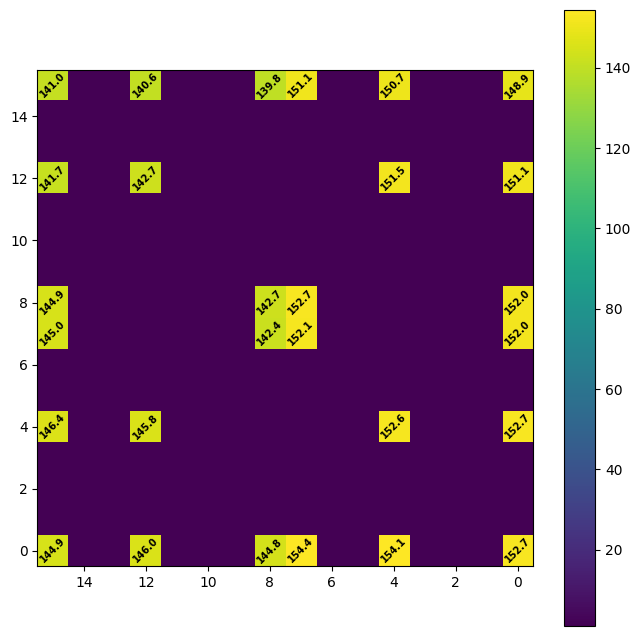

In [10]:
plt.figure(figsize=(8,8))
plt.imshow(table, vmin=1)
plt.colorbar()
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

for i in range(16):
    for j in range(16):
        if table.iloc[i,j] == -1: continue
        plt.text(j, i, table.iloc[i,j], ha="center", va="center", rotation=45, fontweight="bold", fontsize=7)

plt.savefig('cal_mean.png')

In [11]:
table = cals.pivot_table(index='row', columns='col', values='std')
table

col,0,4,7,8,12,15
row,,,,,,
0,0.551820,0.391331,0.494357,0.582711,0.383493,0.574013
4,0.522791,0.516104,NaN,NaN,0.459822,0.553206
7,0.409811,NaN,0.420140,0.518312,NaN,0.642075
8,0.417937,NaN,0.547906,0.607303,NaN,0.573282
12,0.521068,0.516032,NaN,NaN,0.527577,0.580976
15,0.530279,0.545866,0.518817,0.538797,0.580781,0.555262


In [12]:
table = table.reindex(pd.Index(np.arange(0,16), name='')).reset_index()
table = table.reindex(columns=np.arange(0,16))
table = table.fillna(-1)
table = table.round(2)

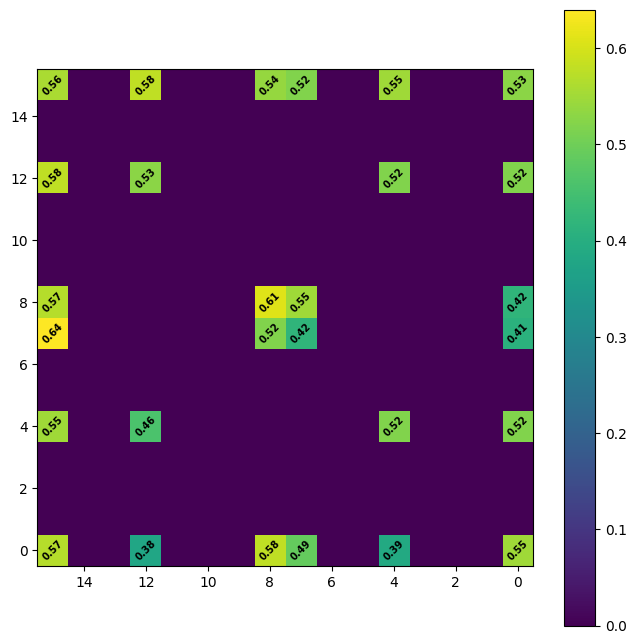

In [13]:
plt.figure(figsize=(8,8))
plt.imshow(table, vmin=0)
plt.colorbar()

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

for i in range(16):
    for j in range(16):
        if table.iloc[i,j] == -1: continue
        plt.text(j, i, table.iloc[i,j], ha="center", va="center", rotation=45, fontweight="bold", fontsize=7)

plt.savefig('cal_std.png')